# Raw Data Extraction and Visualization

### Import required packages

In [10]:
# Notebook display
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML
from pandas.io.formats.style import Styler
import warnings

# General Python
import calendar
import re

# Data storage and manipulation
import numpy as np
import pandas as pd
import censusdata

# Graphing
import matplotlib.pyplot as plt
import seaborn as sns

# Geographies
import geopandas as gpd
from shapely.geometry import Point
import descartes

# Sklearn
from sklearn.preprocessing import StandardScaler

# Custom
import dataretrieval

### Configure standard settings for graph display

In [11]:
# Configure standard settings for graph display
%matplotlib inline
sns.set(rc={'figure.figsize':(25, 4)})
title_font_dict = {'fontsize': 20, 'fontweight' : 'bold'}
axes_font_dict = {'fontsize': 18, 'fontweight' : 'bold'}

### Define functions

In [8]:
def plot_histogram(df, col_name, bins, title, xlabel, ylabel,):
    '''
    Creates a histogram of a continuous variable in the DataFrame.

    Parameters:
        df (pd.DataFrame): the DataFrame
        col_name (str): the name of the column to plot
        bins (int): the number of bins to use
        title (str): the histogram title
        xlabel (str): the label for the histogram's x-axis
        ylabel (str): the label for the histogram's y-axis

    Returns:
        None
    '''
    title_font_dict = {'fontsize': 20, 'fontweight' : 'bold'}
    axes_font_dict = {'fontsize': 18, 'fontweight' : 'bold'}
    
    axes = sns.distplot(df[col_name], bins=bins)
    axes.set_title(title, title_font_dict)
    axes.set_xlabel(xlabel, axes_font_dict)
    axes.set_ylabel(ylabel, axes_font_dict)

In [18]:
def print_metric_over_time(city, metric, df_dict):
    '''
    Prints a metric from the DataFrame for every given year.
    '''
    for year, df in df_dict.items():
        num_bins = 10
        title = f"{metric} in {city} in {year}"
        xlabel = metric
        ylabel = "Density"
        subset = df_dict[year].query("`Affiliated City` == @city")
        
        plot_histogram(subset, metric, num_bins, title, xlabel, ylabel)
        

### Retrieve data from ACS and save output files

In [3]:
config_folder_path = "config"
output_folder_path = "outputs"
df_dict = dataretrieval.orchestrate(config_folder_path, output_folder_path)

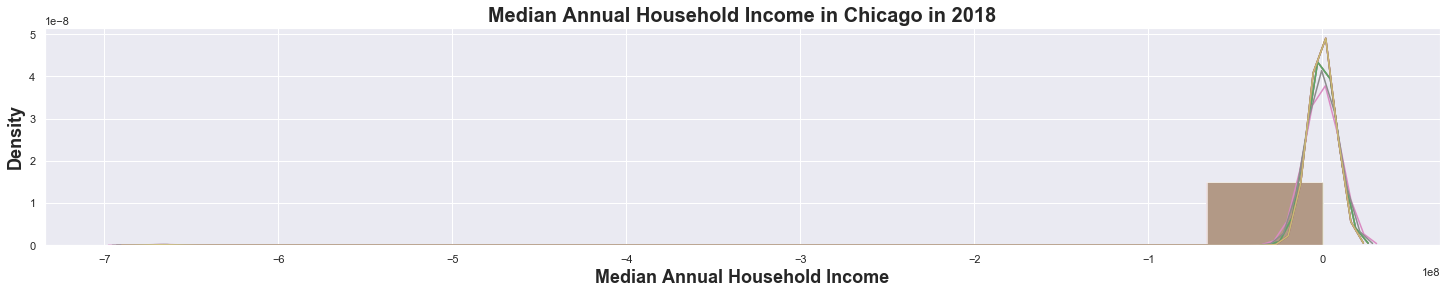

In [22]:
city = "Chicago"
metric = "Median Annual Household Income"

print_metric_over_time(city, metric, df_dict)

In [21]:
InteractiveShell.ast_node_interactivity = "all"